In [18]:
import pandas as pd

In [19]:
import numpy as np

In [20]:
import pandas_datareader.data as web

In [21]:
import datetime

In [22]:
start = datetime.datetime(2009, 12, 29)

In [23]:
end = datetime.datetime(2021, 3, 12 )

In [24]:
code_name = '^KS11'

In [26]:
# code = web.DataReader(code_name, "yahoo", start, end)  # 아래 API를 이용하는 방법

In [27]:
code = web.get_data_yahoo(code_name, start, end)    # API를 활용

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/^KS11/history?period1=1262026800&period2=1615575599&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [89]:
code

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-29,1683.050049,1662.069946,1674.959961,1672.479980,318000.0,1672.479980
2009-12-30,1682.770020,1661.109985,1670.189941,1682.770020,326500.0,1682.770020
2010-01-04,1696.140015,1681.709961,1681.709961,1696.140015,296500.0,1696.140015
2010-01-05,1702.390015,1686.449951,1701.619995,1690.619995,408900.0,1690.619995
2010-01-06,1706.890015,1696.099976,1697.880005,1705.319946,426000.0,1705.319946
...,...,...,...,...,...,...
2021-03-08,3055.649902,2992.639893,3031.989990,2996.110107,1928300.0,2996.110107
2021-03-09,3000.489990,2929.360107,2989.959961,2976.120117,1534200.0,2976.120117
2021-03-10,3013.949951,2951.530029,2980.760010,2958.120117,905600.0,2958.120117


In [90]:
import matplotlib.pyplot as plt

In [91]:
plt.figure(figsize = (8,4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

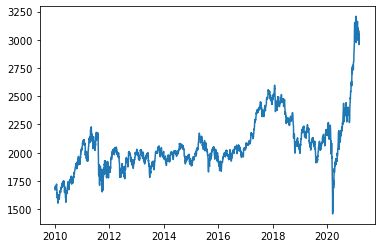

In [92]:
plt.plot(code['Close'])

In [93]:
data = code.filter(['Close']).values

In [94]:
data

array([[1672.47998047],
       [1682.77001953],
       [1696.14001465],
       ...,
       [2958.12011719],
       [3013.69995117],
       [3054.38989258]])

In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
scalar = MinMaxScaler(feature_range=(0,1))

In [97]:
scaled_data = scalar.fit_transform(data)

In [98]:
scaled_data

array([[0.12267106],
       [0.12854655],
       [0.13618066],
       ...,
       [0.85675629],
       [0.88849171],
       [0.91172518]])

In [99]:
len(scaled_data)

2756

In [100]:
import math

In [101]:
training_data_len = math.ceil(len(scaled_data)*0.8)

In [102]:
training_data_len  # 80%에 해당하는 2190개의 데이터 갯수 출력

2205

In [103]:
# set train data

In [104]:
train_data = scaled_data[0:training_data_len]

In [105]:
train_data = np.array(train_data)

In [106]:
np.shape(train_data)

(2205, 1)

In [107]:
x_train = []

In [108]:
y_train = []

In [109]:
PAST_SET = 60

In [110]:
for i in range(PAST_SET, len(train_data), 5):
    x_train.append(train_data[i-PAST_SET:i, 0])
    y_train.append(train_data[i:i+5, 0])

In [111]:
np.shape(x_train)    

(429, 60)

In [112]:
np.shape(y_train)    # 왜 (426,5)으로 저장 : 총 데이터 갯수가 출력의 배수가 되도록 할 것 (210314)

(429, 5)

In [113]:
x_train

[array([0.12267106, 0.12854655, 0.13618066, 0.1330288 , 0.14142229,
        0.12893479, 0.13567819, 0.13502726, 0.13760813, 0.12206014,
        0.13025952, 0.13941247, 0.14511092, 0.14422015, 0.14659548,
        0.15095212, 0.12944869, 0.12136919, 0.10260653, 0.09583462,
        0.10551291, 0.08267339, 0.08496299, 0.07889345, 0.08986211,
        0.09066151, 0.06251177, 0.05432953, 0.06443599, 0.06422473,
        0.08003543, 0.07766581, 0.08188542, 0.09694809, 0.09338506,
        0.07780284, 0.09675962, 0.09778743, 0.08861161, 0.07415422,
        0.07819108, 0.0899192 , 0.0940988 , 0.09167781, 0.10102489,
        0.11556801, 0.11601904, 0.11682415, 0.1136152 , 0.11710965,
        0.10954977, 0.108699  , 0.12859792, 0.12420706, 0.13045364,
        0.12277959, 0.12800407, 0.12754161, 0.1317555 , 0.1370828 ]),
 array([0.12893479, 0.13567819, 0.13502726, 0.13760813, 0.12206014,
        0.13025952, 0.13941247, 0.14511092, 0.14422015, 0.14659548,
        0.15095212, 0.12944869, 0.12136919, 0.

In [114]:
y_train[428]  # 갯수가 5개로 나누어 떨어지는 지 가장 마지막 데이터 확인할 것

array([0.34890224, 0.35293916, 0.34039457, 0.33992632, 0.35682763])

In [115]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [116]:
np.shape(x_train)

(429, 60)

In [117]:
np.shape(y_train)

(429, 5)

In [118]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [119]:
x_train.shape[0]

429

In [120]:
x_train.shape[1]

60

In [121]:
np.shape(x_train)

(429, 60, 1)

In [122]:
x_train

array([[[0.12267106],
        [0.12854655],
        [0.13618066],
        ...,
        [0.12754161],
        [0.1317555 ],
        [0.1370828 ]],

       [[0.12893479],
        [0.13567819],
        [0.13502726],
        ...,
        [0.13430209],
        [0.14933054],
        [0.15179717]],

       [[0.13025952],
        [0.13941247],
        [0.14511092],
        ...,
        [0.15357294],
        [0.15767266],
        [0.15235673]],

       ...,

       [[0.46574932],
        [0.47104239],
        [0.4771005 ],
        ...,
        [0.3670997 ],
        [0.35683334],
        [0.35339027]],

       [[0.48613357],
        [0.48517435],
        [0.49404167],
        ...,
        [0.35708454],
        [0.36644869],
        [0.37147341]],

       [[0.47627831],
        [0.47390305],
        [0.47045997],
        ...,
        [0.38501152],
        [0.37497364],
        [0.36752794]]])

In [123]:
from tensorflow.keras.models import Sequential

In [124]:
from tensorflow.keras.layers import Dense, LSTM

In [125]:
from tensorflow import keras

In [127]:
model = Sequential()

In [128]:
model.add(LSTM(120, return_sequences=True, input_shape=(x_train.shape[1], 1)))

In [129]:
model.add(LSTM(240, return_sequences=True))

In [130]:
model.add(LSTM(240, return_sequences=True))

In [131]:
model.add(LSTM(120, return_sequences=True))

In [132]:
model.add(LSTM(60, return_sequences=False))

In [133]:
model.add(Dense(25))

In [134]:
model.add(Dense(5))

In [135]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [136]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 120)           58560     
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 240)           346560    
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 240)           461760    
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 120)           173280    
_________________________________________________________________
lstm_8 (LSTM)                (None, 60)                43440     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1525      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [137]:
model.fit(x_train, y_train, batch_size=20, epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 49ms/step - loss: 0.0421
Epoch 2/100
22/22 [==============================] - 1s 48ms/step - loss: 0.0040
Epoch 3/100
22/22 [==============================] - 1s 48ms/step - loss: 0.0023
Epoch 4/100
22/22 [==============================] - 1s 48ms/step - loss: 0.0026
Epoch 5/100
22/22 [==============================] - 1s 47ms/step - loss: 0.0016
Epoch 6/100
22/22 [==============================] - 1s 48ms/step - loss: 0.0019
Epoch 7/100
22/22 [==============================] - 1s 48ms/step - loss: 0.0014
Epoch 8/100
22/22 [==============================] - 1s 49ms/step - loss: 0.0024
Epoch 9/100
22/22 [==============================] - 1s 55ms/step - loss: 0.0014
Epoch 10/100
22/22 [==============================] - 1s 50ms/step - loss: 0.0018
Epoch 11/100
22/22 [==============================] - 1s 48ms/step - loss: 0.0014
Epoch 12/100
22/22 [==============================] - 1s 50ms/step - loss: 0.0011
Epoch 13/100
22/22 [=====

In [138]:
# Training 시간 소요

In [139]:
test_data = scaled_data[training_data_len - PAST_SET:,:]

In [140]:
len(test_data)    # 547개 데이터 (20%) + 60개 (예측 시작 점 전 참고 데이터 갯수 60개)

611

In [141]:
x_test = []

In [142]:
y_test = data[training_data_len:,:]

In [143]:
y_test

array([[2095.55004883],
       [2069.37988281],
       [2071.09008789],
       [2062.11010742],
       [2078.84008789],
       [2060.12011719],
       [2061.48999023],
       [2055.01000977],
       [2028.01000977],
       [2028.43994141],
       [2041.04003906],
       [2010.        ],
       [1993.69995117],
       [2010.25      ],
       [2037.09997559],
       [2025.27001953],
       [2064.70996094],
       [2063.2800293 ],
       [2075.57006836],
       [2064.52001953],
       [2097.17993164],
       [2106.10009766],
       [2107.06005859],
       [2124.2800293 ],
       [2124.61010742],
       [2117.77001953],
       [2127.7800293 ],
       [2145.0300293 ],
       [2177.72998047],
       [2177.30004883],
       [2183.36010742],
       [2206.19995117],
       [2204.85009766],
       [2203.45996094],
       [2203.41992188],
       [2177.05004883],
       [2180.72998047],
       [2190.4699707 ],
       [2201.47998047],
       [2225.85009766],
       [2196.09008789],
       [2210.889

In [144]:
for i in range(PAST_SET, len(test_data), 5):
    x_test.append(test_data[i-PAST_SET:i, 0])

In [145]:
x_test = np.array(x_test)

In [146]:
np.shape(x_test)      # LSTM의 Input 구조를 확인

(111, 60)

In [147]:
x_test

array([[0.47122501, 0.47311501, 0.49139806, ..., 0.34039457, 0.33992632,
        0.35682763],
       [0.48580807, 0.49436717, 0.50334309, ..., 0.35027269, 0.34514523,
        0.35469785],
       [0.50317748, 0.48644193, 0.46641162, ..., 0.34109116, 0.32567448,
        0.32591997],
       ...,
       [0.66706821, 0.67137348, 0.64732925, ..., 0.9262055 , 0.92068981,
        0.87780283],
       [0.70721442, 0.72733032, 0.73531844, ..., 0.90571852, 0.9280555 ,
        0.90550147],
       [0.73590086, 0.74937623, 0.7448882 , ..., 0.86703407, 0.85675629,
        0.88849171]])

In [148]:
np.shape(x_test)

(111, 60)

In [149]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [150]:
predictions = model.predict(x_test)

In [151]:
predictions

array([[0.34860814, 0.344552  , 0.35275972, 0.35236284, 0.34451914],
       [0.34503612, 0.34135097, 0.3495073 , 0.3489158 , 0.34168988],
       [0.32227004, 0.31878448, 0.3270165 , 0.32605413, 0.31928438],
       [0.32034314, 0.31706834, 0.3257781 , 0.325091  , 0.31778127],
       [0.34374934, 0.3403649 , 0.34915766, 0.34800676, 0.34284335],
       [0.37739378, 0.37324956, 0.38177156, 0.38078102, 0.37599537],
       [0.41110542, 0.40690786, 0.41477618, 0.4143732 , 0.408261  ],
       [0.42045736, 0.41585472, 0.4233261 , 0.4228858 , 0.41613466],
       [0.43263024, 0.42792192, 0.43519345, 0.4358179 , 0.42679206],
       [0.43701687, 0.43208575, 0.43966645, 0.44039854, 0.43126017],
       [0.42262504, 0.4168373 , 0.42511028, 0.42543098, 0.41703728],
       [0.38959703, 0.38363633, 0.39211676, 0.3925803 , 0.38344955],
       [0.40006888, 0.39484447, 0.40355757, 0.40416747, 0.3952102 ],
       [0.41168293, 0.40594643, 0.4152792 , 0.41529316, 0.40799147],
       [0.38625863, 0.38019058, 0.

In [152]:
predictions = scalar.inverse_transform(predictions)

In [153]:
np.shape(predictions)

(111, 5)

In [154]:
predictions

array([[2068.1748, 2061.071 , 2075.4456, 2074.7507, 2061.0134],
       [2061.919 , 2055.465 , 2069.7495, 2068.7136, 2056.0586],
       [2022.0476, 2015.9431, 2030.3605, 2028.6749, 2016.8187],
       [2018.6729, 2012.9375, 2028.1914, 2026.988 , 2014.1863],
       [2059.6655, 2053.738 , 2069.1372, 2067.1218, 2058.0789],
       [2118.5886, 2111.3308, 2126.2556, 2124.5208, 2116.1394],
       [2177.6296, 2170.278 , 2184.0583, 2183.3525, 2172.648 ],
       [2194.0078, 2185.9473, 2199.0322, 2198.2612, 2186.4375],
       [2215.327 , 2207.081 , 2219.8162, 2220.9097, 2205.1023],
       [2223.0095, 2214.3733, 2227.65  , 2228.932 , 2212.9275],
       [2197.8044, 2187.668 , 2202.157 , 2202.7185, 2188.0183],
       [2139.9607, 2129.5215, 2144.3735, 2145.1855, 2129.1943],
       [2158.3005, 2149.151 , 2164.4106, 2165.4788, 2149.7915],
       [2178.6409, 2168.5942, 2184.9392, 2184.9636, 2172.1758],
       [2134.114 , 2123.4868, 2140.0222, 2139.7102, 2126.2458],
       [2198.1243, 2189.091 , 2204.8596,

In [155]:
predictions.shape = (111*5, 1)

In [156]:
predictions

array([[2068.1748],
       [2061.071 ],
       [2075.4456],
       [2074.7507],
       [2061.0134],
       [2061.919 ],
       [2055.465 ],
       [2069.7495],
       [2068.7136],
       [2056.0586],
       [2022.0476],
       [2015.9431],
       [2030.3605],
       [2028.6749],
       [2016.8187],
       [2018.6729],
       [2012.9375],
       [2028.1914],
       [2026.988 ],
       [2014.1863],
       [2059.6655],
       [2053.738 ],
       [2069.1372],
       [2067.1218],
       [2058.0789],
       [2118.5886],
       [2111.3308],
       [2126.2556],
       [2124.5208],
       [2116.1394],
       [2177.6296],
       [2170.278 ],
       [2184.0583],
       [2183.3525],
       [2172.648 ],
       [2194.0078],
       [2185.9473],
       [2199.0322],
       [2198.2612],
       [2186.4375],
       [2215.327 ],
       [2207.081 ],
       [2219.8162],
       [2220.9097],
       [2205.1023],
       [2223.0095],
       [2214.3733],
       [2227.65  ],
       [2228.932 ],
       [2212.9275],


In [157]:
len(predictions)

555

In [158]:
#rmse = np.sqrt(np.mean(predictions - y_test)**2)

In [159]:
#rmse

In [160]:
data = code.filter(['Close'])

In [161]:
data

,Close
Date,
2009-12-29,1672.479980
2009-12-30,1682.770020
2010-01-04,1696.140015
2010-01-05,1690.619995
2010-01-06,1705.319946
...,...
2021-03-08,2996.110107
2021-03-09,2976.120117
2021-03-10,2958.120117


In [162]:
train = data[:training_data_len]

In [163]:
train

,Close
Date,
2009-12-29,1672.479980
2009-12-30,1682.770020
2010-01-04,1696.140015
2010-01-05,1690.619995
2010-01-06,1705.319946
...,...
2018-12-06,2068.689941
2018-12-07,2075.760010
2018-12-10,2053.790039


In [164]:
valid = data[training_data_len:len(data)]  # 6개씩 예측하므로 끝자리가 딱 맞아 떨어지지 않는 문제점 / 임의로 13개 데이터 제외??

In [165]:
#type(valid)

In [166]:
start = datetime.datetime(2010, 1, 1)

In [167]:
end = datetime.datetime(2021, 3, 12)

In [168]:
code = web.get_data_yahoo(code_name, start, end)    # API를 활용

In [169]:
code

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1696.140015,1681.709961,1681.709961,1696.140015,296500.0,1696.140015
2010-01-05,1702.390015,1686.449951,1701.619995,1690.619995,408900.0,1690.619995
2010-01-06,1706.890015,1696.099976,1697.880005,1705.319946,426000.0,1705.319946
2010-01-07,1707.900024,1683.449951,1702.920044,1683.449951,462400.0,1683.449951
2010-01-08,1695.260010,1668.839966,1694.060059,1695.260010,380000.0,1695.260010
...,...,...,...,...,...,...
2021-03-08,3055.649902,2992.639893,3031.989990,2996.110107,1928300.0,2996.110107
2021-03-09,3000.489990,2929.360107,2989.959961,2976.120117,1534200.0,2976.120117
2021-03-10,3013.949951,2951.530029,2980.760010,2958.120117,905600.0,2958.120117


In [170]:
data = code.filter(['Close'])

In [171]:
len(data)

2754

In [172]:
valid = data[training_data_len-1:len(data)]

In [173]:
valid

,Close
Date,
2018-12-14,2069.379883
2018-12-17,2071.090088
2018-12-18,2062.110107
2018-12-19,2078.840088
2018-12-20,2060.120117
...,...
2021-03-08,2996.110107
2021-03-09,2976.120117
2021-03-10,2958.120117


In [174]:
from datetime import datetime

In [175]:
add_date_time = [datetime(2021,3,15), datetime(2021,3,16), datetime(2021,3,17), datetime(2021,3,18), datetime(2021,3,19)]

In [176]:
add_dummy_data = [np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]

In [177]:
add_predict_date = pd.DataFrame(add_dummy_data, add_date_time, columns = ['a'])

In [178]:
add_predict_date

,a
2021-03-15,NaN
2021-03-16,NaN
2021-03-17,NaN
2021-03-18,NaN
2021-03-19,NaN


In [179]:
valid = pd.concat([valid, add_predict_date], axis = 0)  # 0 행 방향 연결

In [180]:
valid.drop(['a'], axis=1)

,Close
2018-12-14,2069.379883
2018-12-17,2071.090088
2018-12-18,2062.110107
2018-12-19,2078.840088
2018-12-20,2060.120117
...,...
2021-03-15,NaN
2021-03-16,NaN
2021-03-17,NaN
2021-03-18,NaN


In [181]:
len(predictions)

555

In [182]:
len(valid)

555

In [183]:
#predictions = pd.DataFrame(predictions, columns = ['Predictions'])

In [184]:
predictions

array([[2068.1748],
       [2061.071 ],
       [2075.4456],
       [2074.7507],
       [2061.0134],
       [2061.919 ],
       [2055.465 ],
       [2069.7495],
       [2068.7136],
       [2056.0586],
       [2022.0476],
       [2015.9431],
       [2030.3605],
       [2028.6749],
       [2016.8187],
       [2018.6729],
       [2012.9375],
       [2028.1914],
       [2026.988 ],
       [2014.1863],
       [2059.6655],
       [2053.738 ],
       [2069.1372],
       [2067.1218],
       [2058.0789],
       [2118.5886],
       [2111.3308],
       [2126.2556],
       [2124.5208],
       [2116.1394],
       [2177.6296],
       [2170.278 ],
       [2184.0583],
       [2183.3525],
       [2172.648 ],
       [2194.0078],
       [2185.9473],
       [2199.0322],
       [2198.2612],
       [2186.4375],
       [2215.327 ],
       [2207.081 ],
       [2219.8162],
       [2220.9097],
       [2205.1023],
       [2223.0095],
       [2214.3733],
       [2227.65  ],
       [2228.932 ],
       [2212.9275],


In [185]:
len(valid)

555

In [186]:
valid.loc[:,'Predictions'] = np.array(predictions)

In [187]:
valid

,Close,a,Predictions
2018-12-14,2069.379883,NaN,2068.174805
2018-12-17,2071.090088,NaN,2061.071045
2018-12-18,2062.110107,NaN,2075.445557
2018-12-19,2078.840088,NaN,2074.750732
2018-12-20,2060.120117,NaN,2061.013428
...,...,...,...
2021-03-15,NaN,NaN,3040.077393
2021-03-16,NaN,NaN,2990.063232
2021-03-17,NaN,NaN,3077.821289
2021-03-18,NaN,NaN,3090.265137


In [188]:
plt.figure(figsize = (15,4))

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

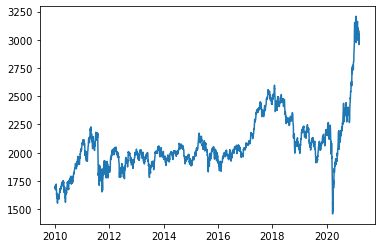

In [189]:
plt.plot(data['Close'])

(0.0, 1.0)

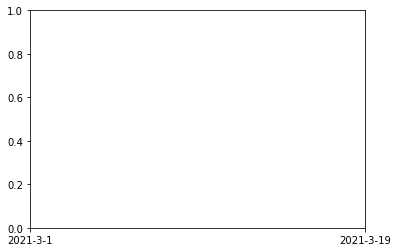

In [190]:
plt.xlim('2021-3-1', '2021-3-19')

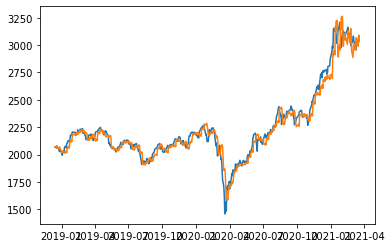

In [191]:
plt.plot(valid['Close'], label='Close')
plt.plot(valid['Predictions'], label='Prediction')

In [205]:
#plt.legend(['Train', 'Val', 'Predictions'])

In [206]:
#plt.show()